In [1]:
from eda_functions import *
from sklearn.cluster import KMeans
%matplotlib inline 
%run cloud_eda.py
%load_ext autoreload
%autoreload 2

Retrieved dataframe with 1962299 efforts in 171.29 seconds


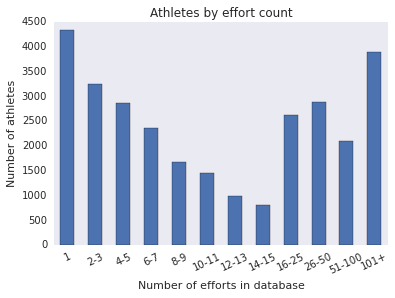

In [2]:
plot_num_athletes_by_effort_count_hist(df)

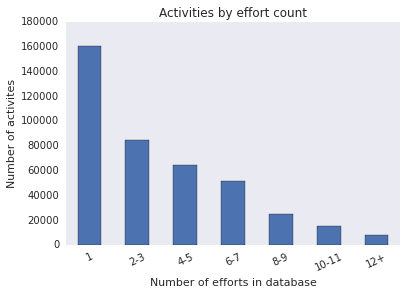

In [3]:
plot_num_activities_by_effort_count_hist(df)

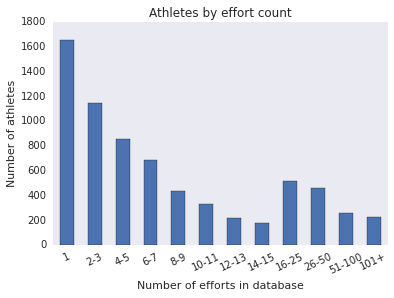

In [8]:
plot_num_athletes_by_effort_count_hist(df[pd.isnull(df.average_watts)])

In [81]:
df.columns

Index([     u'average_watts',       u'device_watts',           u'distance',
             u'elapsed_time',        u'moving_time',         u'athlete_id',
               u'segment_id',        u'activity_id',  u'seg_average_grade',
             u'seg_distance',  u'seg_elevation_low', u'seg_elevation_high',
        u'seg_maximum_grade',               u'date',     u'tracks_cadence',
         u'tracks_heartrate',          u'dist_diff'],
      dtype='object')

In [25]:
df.segment_id.unique()

array([7481858,  934409, 1329495, 4783121, 9008146,  866323, 7531032,
       2234914,  841251,  747045, 6838822, 4173351, 2707292, 4178476,
       5857327,    1077, 8050750,    2627,  622149, 4599878, 1042514,
        866902,  633435, 3559004, 1213534, 6458467, 8285294, 2858097,
        852755, 6173812,  806005,     118, 8042617,  925819, 8239228,
           125, 1745022, 1451654, 3305098, 6768781, 2188435, 7969432,
       2665113, 2350753, 8692386,  798887, 1173191,  821934,     180,
        814196,    1723, 6325954, 2451142, 2350791,  666315, 5611730,
        975395,  881888, 6366843, 1003240, 4779241, 5079282, 2687221,
        835833, 6546684, 1105154, 7615757, 6135256, 5292307,  356635,
       2339624,  612159, 4367683, 6875972, 6478150, 3200333, 2687319,
       5831003, 1759580, 5642079, 2435434, 7883627,  844654, 2958707,
        351211, 8727940, 8727433, 7074191, 5099924, 3066267, 5836703,
       8800675, 3545515, 4062646,  774591,  991174,  651728,  640981,
       7186902, 8594

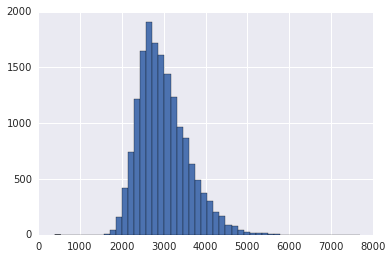

In [54]:
df.query('segment_id == 1723').moving_time.hist(bins=50)

In [52]:
cleaner_df = df[df.dist_diff.abs() < 1000]

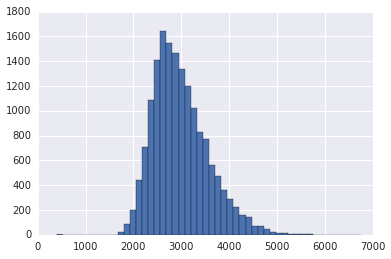

In [55]:
cleaner_df.query('segment_id == 1723').moving_time.hist(bins=50)

In [108]:
cluster_columns = ['distance', 'dist_diff', 'moving_time', 'elapsed_time', 'tracks_cadence', 'tracks_heartrate']
num_clusters = 100
km = KMeans(n_clusters=num_clusters, max_iter=100)
km.fit(df[cluster_columns].values)

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=100, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [109]:
clusters = pd.DataFrame(km.cluster_centers_.astype(float).T, index=cluster_columns, columns=['Cluster {}'.format(i) for i in range(num_clusters)])

In [110]:
clusters

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,...,Cluster 90,Cluster 91,Cluster 92,Cluster 93,Cluster 94,Cluster 95,Cluster 96,Cluster 97,Cluster 98,Cluster 99
distance,2005.044281,1.471600e+03,6.628100e+03,6.039000e+02,2980.7,10327.918755,809.738746,2939.6,3264.326023,17669.497698,...,3544.645134,1369.193466,992.393263,8802.080311,10421.464196,18099.479310,4889.495757,610.383834,29987.028571,5064.746151
dist_diff,-10.496694,-1.990000e+01,-2.351500e+01,-7.600000e+00,112.3,-196.668790,-21.516107,134.7,-63.733533,-318.597698,...,-84.665007,-3.577479,-4.675077,-179.560311,-418.323884,-7421.314828,-32.287734,-9.729481,-19694.185714,-285.093452
moving_time,357.222827,3.460000e+02,2.015500e+03,4.800000e+01,892.0,1995.528101,201.361649,235.0,585.648868,4098.302243,...,1366.855390,499.043740,413.002689,2453.749866,3116.053571,4154.551724,2301.407407,50.259966,4768.571429,2927.174603
elapsed_time,357.501756,1.416470e+09,2.903060e+08,1.426063e+09,2729147.0,2038.303187,203.688923,605036.0,591.998928,4472.756789,...,1479.146097,519.231348,428.916741,2514.332084,4283.854911,4720.931034,2524.157959,50.299168,4861.857143,4347.896825
tracks_cadence,0.412713,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.480512,0.267869,1.0,0.403100,0.431523,...,0.108922,0.107595,0.044028,0.098018,0.256696,0.448276,0.037773,0.367449,0.857143,0.031746
tracks_heartrate,0.494731,0.000000e+00,1.000000e+00,0.000000e+00,0.0,0.536606,0.395849,0.0,0.467551,0.497639,...,0.342751,0.247339,0.224205,0.285485,0.337054,0.724138,0.286485,0.463424,0.857143,0.126984


In [111]:
for i in range(num_clusters):
    print 'Size of cluster {}: {}'.format(i, sum(km.labels_ == i))

Size of cluster 0: 118998
Size of cluster 1: 1
Size of cluster 2: 2
Size of cluster 3: 1
Size of cluster 4: 1
Size of cluster 5: 9288
Size of cluster 6: 74824
Size of cluster 7: 1
Size of cluster 8: 44778
Size of cluster 9: 1694
Size of cluster 10: 5408
Size of cluster 11: 3708
Size of cluster 12: 1
Size of cluster 13: 1938
Size of cluster 14: 83396
Size of cluster 15: 68156
Size of cluster 16: 31698
Size of cluster 17: 49129
Size of cluster 18: 10937
Size of cluster 19: 3
Size of cluster 20: 5153
Size of cluster 21: 15152
Size of cluster 22: 86510
Size of cluster 23: 35990
Size of cluster 24: 17754
Size of cluster 25: 2540
Size of cluster 26: 33788
Size of cluster 27: 65196
Size of cluster 28: 1
Size of cluster 29: 4
Size of cluster 30: 2082
Size of cluster 31: 1
Size of cluster 32: 20
Size of cluster 33: 31515
Size of cluster 34: 2
Size of cluster 35: 1830
Size of cluster 36: 41917
Size of cluster 37: 19800
Size of cluster 38: 8868
Size of cluster 39: 1046
Size of cluster 40: 5307
Si

In [114]:
df.ix[km.labels_ == 98]

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff
372281,190.6,False,34989.5,6699,6322,143151,2707292,7715205,3.9,17350.9,53.4,791.2,22.2,2012-05-01 14:50:51,True,False,-17638.6
440538,206.7,True,26434.1,4488,4479,444050,622149,9505632,4.0,10131.9,42.4,452.2,166.4,2012-05-23 14:48:57,True,True,-16302.2
441599,188.4,True,31426.6,6053,5786,114783,622149,17953915,4.0,10131.9,42.4,452.2,166.4,2012-08-11 10:13:48,True,True,-21294.7
441857,184.3,True,29684.5,5499,5499,114783,622149,20511561,4.0,10131.9,42.4,452.2,166.4,2012-09-01 09:30:19,True,True,-19552.6
443402,196.3,True,32891.2,5659,5659,114783,622149,39548297,4.0,10131.9,42.4,452.2,166.4,2013-02-02 11:01:22,True,True,-22759.3
443491,202.5,True,29962.3,5259,5259,114783,622149,40358238,4.0,10131.9,42.4,452.2,166.4,2013-02-09 10:35:52,True,True,-19830.4
1724332,272.7,False,24521.0,376,376,318392,4259807,5898365,-3.8,4039.5,288.0,441.6,39.3,2010-08-01 14:15:37,False,True,-20481.5


In [113]:
df.query('segment_id == 122831')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff
249287,168.8,False,473.800,108,108,122831,866323,97947332,-4.5,464.03,248.4,269.4,-0.9,2013-11-30 13:28:25,False,True,-9.770
459908,135.7,False,1188.030,160,160,122831,4599878,2157815,-9.7,1210.90,190.2,313.6,19.7,2011-10-30 12:17:27,False,False,22.870
480242,216.7,False,4470.610,1815,1644,122831,2858097,1768520,6.0,4586.65,65.6,341.5,28.2,2011-09-25 14:37:57,False,False,116.040
480486,199.8,False,5192.530,2305,1915,122831,2858097,2239896,6.0,4586.65,65.6,341.5,28.2,2011-11-06 11:54:11,False,False,-605.880
489940,203.9,False,4530.800,1527,1527,122831,2858097,97886632,6.0,4586.65,65.6,341.5,28.2,2013-11-16 13:43:04,False,True,55.850
497466,136.6,False,4633.300,1731,1731,122831,2858097,231706667,6.0,4586.65,65.6,341.5,28.2,2014-12-21 14:27:49,False,True,-46.650
521944,227.8,False,869.100,232,232,122831,8042617,2157815,6.3,899.20,245.7,302.2,24.2,2011-10-30 12:13:19,False,False,30.100
592567,NaN,False,1413.220,116,116,122831,3305098,2222816,-8.7,1454.51,7.5,134.9,0.1,2011-11-05 12:46:47,False,False,41.290
592596,106.5,False,1516.280,103,103,122831,3305098,2259105,-8.7,1454.51,7.5,134.9,0.1,2011-11-08 10:14:13,False,False,-61.770
592642,42.0,False,1465.770,117,117,122831,3305098,2322297,-8.7,1454.51,7.5,134.9,0.1,2011-11-13 16:05:05,False,False,-11.260
